# Tackling Hyperinflammation, one Golgi at a time

#### Done by: Austin, Justin, Hemant, Yuyan
#### Special mentions to: Daniel Cheng (Mentor) and Dr Robert (Homie)

## 1. Background

### 1.1 Lore of TNF-α
* TNF-α is an inflammatory molecule (termed as cytokines), where it is secreted by cells under stress.
* It initiates inflammation by triggering a cascade of other inflammatory molecules which recruit immune cells to further drive 
inflammation.
* TNF-α levels will decrease rapidly after elimination of pathogens or undesired junk, causing cessation of inflammation.

<img src="https://www.mdpi.com/ijms/ijms-24-06142/article_deploy/html/images/ijms-24-06142-g002-550.jpg" alt="drawing" width="600"/><br>
Figure 1: Diagram describing the pathway involving TNF-α physiological's response.


### 1.2 Synthesis pathway of TNF-α
<img src="Synthesis pathway of TNFa.png" alt="drawing" width="600"/><br>
Figure 2: Diagram describing TNF-α synthesis, processing and export pathway
* Here, an inflammatory stimuli is input from the surroundings.
* This will activate a transduction pathway, upregulating the expression of TNF-α in the cell. The TNF-α gene will be transcribed into mRNA, it will be translated in the cytoplasm by the ribosomes, forming a pre-protein (meaning immature protein).
* The pre-TNF-α, will be transported into the endoplasmic reticulum for processing, and subsequently be transported into Golgi apparatus based for further transporting, packing and finally, transport out of the cell.
* This transport is facilitated by Kinesin-1, which carries the package on the microtubules, out of the cell

### 1.3 Implications of TNF-α in hyperinflammatory diseases
<img src="Cytokine storm.png" alt="drawing" width="600"/><br>
Figure 3: Simplified illustration of cytokine storm and its effects.
* Patients with hyperinflammatory diseases such as Rheumatoid Arthritis, Crohn's Disease, Psoriasis, where they exhibit excessive release of cytokines during inflammation, known as cytokine storm
* Following the excessive release of cytokines during inflammation, it causes hyperactivation of the immune system and (dangerously) high levels of inflammation. As it will also cause a release in TNF-α, it generates a positive feedback loop and further manifests the hyperinflammatory response.
* This damages healthy cells and tissues, increasing the risk of developing autoimmune diseases and organ damage (as such in Crohn's Disease)


### 1.4 Existing Treatments
* Common treatments utilise neutralising antibodies that target TNF-α, blocking its interaction with TNF-α receptors on cell surfaces and this in turn, blocks the activation of TNF-α pathway described in Figure 1.
* However, they are not always effective as:
    * While they are effective at blocking the action of soluble TNF-α, it might be less effective at blocking membrane-bound TNF-α
    * They can only 1 out of the 2 types of TNF-α, thus limiting its action on mechanism
<img src="https://www.frontiersin.org/files/Articles/533034/fcell-08-00401-HTML/image_m/fcell-08-00401-g002.jpg" alt="drawing" width="600"/><br>
Figure 4: **(A)** Activation of TNFR1 and TNFR2 by membrane-bound TNF (mTNF), soluble TNF and LTα. **(B)** Global inhibition of TNFR1 and TNFR2 by anti-TNF antibodies and soluble TNFR2-Fc fusion proteins. **(C)** Selective inhibition of TNFR1 by anti-TNFR1 antibodies and dominant-negative TNFR1-selective TNF muteins. **(D)** Selective activation of TNFR2 by anti-TNFR2 antibodies and multivalent TNFR2-selective TNF muteins.


### 1.5 Kinesin-1 plays a vital role in protein export
<img src="Kinesin-1 transporting TNFa.png" alt="drawing" width="400"/><br>
Figure 5: Mechanism of Kinesin-1
* Processed proteins are packaged in Golgi, where they are loaded onto Kinesin-1.
* Kinesin-1 is an export protein, which travels unidirectionally outward along web-like scaffold within the cells, from Golgi to outside of the cell.
* Kinesore inhibits Kinesin-1, prevent the action of Kinesin-1 and stops protein export out of the cell. Thus, this drug was employed to investigate its use, and potential therapeutic targets for future drugs.


## 2 Robert's Golgi

### 2.1 Experimental outline
<img src="Kinesin-1 transporting TNFa fusion.png" alt="drawing" width="400"/><br>
* Dr Robert studied TNF-α trafficking to propose potential therapeutic targets that intervene and stop hyperinflammatory response in patients
* Our goal here is to find a drug that can dampen the inflammatory response, but not fully eliminate it as inflammation is still required for normal homeostatic processes within the body, such as clearing of cell debris etc.
* Here, Dr Robert utilised kinesore as a proof-of-concept that it can regulate magnitude of protein export. Degree of regulation depends on concentration of kinesore used.


### 2.2 Incorporation of RUSH system

In [13]:
import os, glob, shutil, cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.stats import linregress
from skimage.filters import threshold_otsu, threshold_yen, try_all_threshold, threshold_minimum
import skimage.measure as measure

#Extracting frames from video using cv2 package

In [14]:
#find videos
print(f'Current directory: {os.getcwd()}')

path_to_videos = glob.glob(os.path.join('Videos','*.avi'))
print(path_to_videos, '-'*10, sep = '\n')
#create required directories
def makefolders(path):
    folder = os.path.split(path) #create folders for extracting all images
    folder = os.path.splitext(folder[-1])
    folder_create = os.path.join('Videos',folder[0])
    if os.path.exists(folder_create) == False:
        os.mkdir(folder_create)
    else:
        pass
    return folder_create

#navigate into folder for the image and save images
def saveimages(path, dir_name):
    cam = cv2.VideoCapture(path)
    count, success = 0, True
    video_index = []
    while success:
        success, image = cam.read()
        if not cam.isOpened():
            print(f"Error: Could not open video file {path}")
        os.chdir(dir_name)
        if success:
            folder = os.path.split(dir_name)
            frame = f'{folder[-1]}_frame_{count:02}.jpg'
            video_index.append(frame)
            if os.path.exists(frame) == False:
                cv2.imwrite(frame, image)
                print(f'{frame} successfully saved')
                count+=1
            else:
                print(f'{frame} already exists, skipping save')
                count+=1
        else:
            print('End of file')
        os.chdir(os.path.join('..','..'))
    cam.release()
    print(f'Current directory: {os.getcwd()} \n Completed {path}\n--------------------')
    return video_index

Current directory: C:\Users\austi\Documents\learning-portfolio-2024-aug-immunoglobulinaustin\final_group_project
['Videos\\0.5ugDNA_drug10uM_5min45min_1.avi', 'Videos\\0.75ugDNA_drug10uM_5min45min_1.avi', 'Videos\\1ugDNA_drug10uM_5min45min_1.avi', 'Videos\\LipoKDEL1ug_biotin_drug25uM_live_5min1h.avi', 'Videos\\LipoKDEL1ug_biotin_no drug_live_5min1h.avi', 'Videos\\XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h.avi', 'Videos\\XtremeStr-li1.5ug_biotin_no drug_live_5min45min.avi']
----------


In [15]:
video_indexes, folder_indexes = [], []
vf_dict = {}
for path in path_to_videos:
    dir_name = makefolders(path)
    folder_indexes.append(dir_name)
    img_names = saveimages(path, dir_name)
    video_indexes.append(img_names)
    vf_dict[os.path.split(dir_name)[-1]] = img_names

#show structure of the dictionary
for key, item in vf_dict.items():
    print(key, item, '\n')

0.5ugDNA_drug10uM_5min45min_1_frame_00.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_01.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_02.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_03.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_04.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_05.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_06.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_07.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_08.jpg already exists, skipping save
0.5ugDNA_drug10uM_5min45min_1_frame_09.jpg already exists, skipping save
End of file
Current directory: C:\Users\austi\Documents\learning-portfolio-2024-aug-immunoglobulinaustin\final_group_project 
 Completed Videos\0.5ugDNA_drug10uM_5min45min_1.avi
--------------------
0.75ugDNA_drug10uM_5min45min_1_frame_00.jpg already exists, skipping sa

#Process fluorescence data - First pass

In [16]:
# Functions for extracting and plotting the raw data
cwd = os.getcwd() #getting current working directory

temp = glob.glob(os.path.join(cwd, 'Videos', '*')) #in my current working directory, access videos folder and list me all the files inside
video_folders = [file for file in temp if not file.endswith(".avi")]
#using list comprehension. access the files inside temp, isolate the files with '.avi', and exclude it. store as video_folders

folders_to_process = ('LipoKDEL1ug_biotin_no drug_live_5min1h',  'LipoKDEL1ug_biotin_drug25uM_live_5min1h',
                      'XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h',
                      '0.5ugDNA_drug10uM_5min45min_1', '0.75ugDNA_drug10uM_5min45min_1', '1ugDNA_drug10uM_5min45min_1')

region_of_interest = {'0.5ugDNA_drug10uM_5min45min_1': [(300,500, 400,600)],
           '0.75ugDNA_drug10uM_5min45min_1': [(300,475, 375,550),(690,780, 400,500), (530,630, 530,630)],
           '1ugDNA_drug10uM_5min45min_1': [(400,550, 180,300),(695,790, 655,725)],
           'LipoKDEL1ug_biotin_drug25uM_live_5min1h': [(625,740, 600,720)],
           'LipoKDEL1ug_biotin_no drug_live_5min1h': [(550,690, 450,600)],
           'XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h': [(285,400, 70,150),(615,675, 650,715), (170,260, 970,1024)]
}

#creating a function called extract_fluorescenceData, to loop through the 7 different folders.
def extract_fluorescenceData(folder_path, img_order, resolutions):
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]
                total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence #return here so can use in "histogrammer" function. this variable will be 'video1' in histogrammer function

def histogrammer(video1, n): #video1 is an array of the max fluorescence values, i simply stands for index
    video1_normalise = video1/max(video1) #normalising to highest sum fluorescent signal in the frames.
    name = os.path.split(n) #split it by \\ into index, where [0] = your directory and [i] in this case is folder names
    x = range(1, len(video1)+1) #plotting frame 1 to n+1

    #plotting segment
    plt.plot(x, video1_normalise, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

    #Labels & aesthetics
    plt.xticks(x) #this makes it show every tick in X axis
    plt.xlabel('Frame number', fontsize = 10)
    plt.ylabel('Total fluorescence signal', fontsize = 10)
    plt.grid(alpha = .25)
    plt.tight_layout()


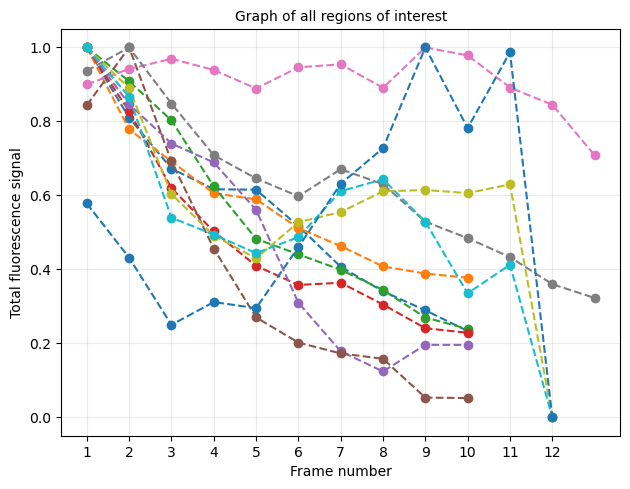

In [17]:
for key in region_of_interest.keys():
    for i in range(len(region_of_interest[key])):
        video1 = extract_fluorescenceData(key, vf_dict[key], region_of_interest[key][i])
        histogrammer(video1, key)
plt.title('Graph of all regions of interest', fontsize = 10)
plt.show()

#Attempting to assess the cropping of the images

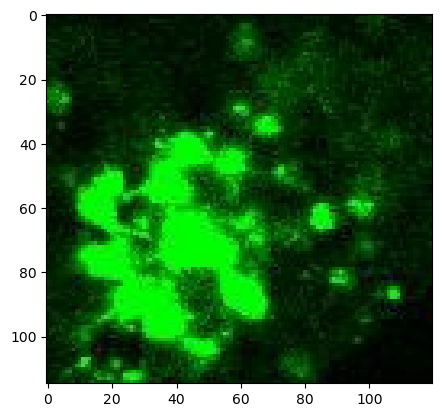

In [18]:
#goal: identify green regions and calculate area to intensity ratio for lipoKDEL1ug_biotin_drug25uM
video = {'LipoKDEL1ug_biotin_drug25uM_live_5min1h': (625,740, 600,720)}

img_path = 'LipoKDEL1ug_biotin_drug25uM_live_5min1h_frame_03.jpg'
img = plt.imread(os.path.join('Videos',list(video.keys())[0], img_path))
img = img[625:740,600:720]

plt.imshow(img)

img_grey = rgb2gray(img)
plt.show()

12078.0
---------- Region 0 ----------
Centre	: (54.999254843517136, 62.18065904951151)
Area	: 12078.0


---------- Region 1 ----------
Centre	: (84.0, 34.0)
Area	: 1.0




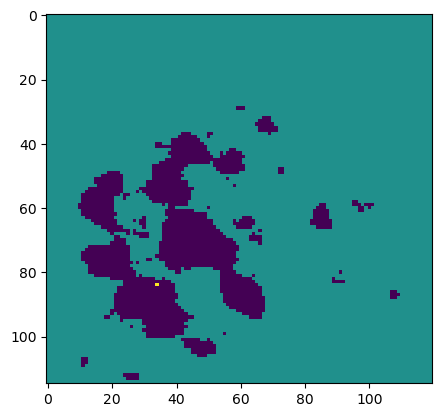

In [19]:
threshold = threshold_minimum(img_grey)
img_binarised = img_grey < threshold

img_labelled = measure.label(img_binarised.astype('uint8'))
plt.imshow(img_labelled)
 # measure.label() requires an image of type int
img_labelled = measure.label(img_binarised.astype('uint8'))
region_info = measure.regionprops(img_labelled)
print(region_info[0].area)

no_of_regions = len(region_info)

for count, region in enumerate(region_info):
    print('-'*10, f'Region {count}', '-'*10)
    print(f'Centre\t: {region.centroid}')
    print(f'Area\t: {region.area}')
    print('\n')

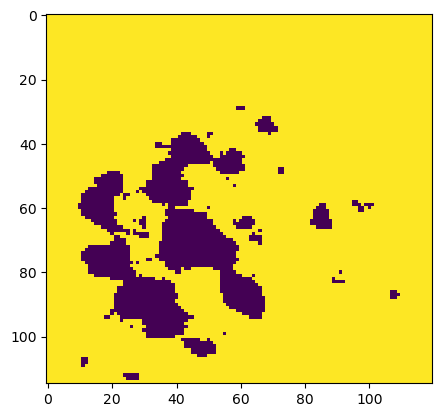

In [20]:
img_masked = img_labelled == 1
plt.imshow(img_masked)
plt.show()

In [21]:
def ratio_Data(folder_path, img_order, resolutions): #attempting to find fluorescence/area ratio
    total_fluorescence, areas = [], []
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path):
            # if img.lower().endswith('.jpg'): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]

                try:
                    threshold = threshold_minimum(cropped_img)
                    binarised_img = cropped_img < threshold
                    img_labelled = measure.label(binarised_img.astype('uint8'))
                    region_info = measure.regionprops(img_labelled)

                    total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
                    areas.append((y2-y1)*(x2-x1) - region_info[0].area)
                except RuntimeError:
                    print(f'Error with {img} image')
                    pass
    else:
        print(f'Subdirectory {video_folders} not found')
    ratio = np.array(total_fluorescence)/np.array(areas)
    return ratio

def overlay_threshold(folder_path, img_order, resolutions, return_base = True):
    total_fluorescence, areas = [], []
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration
    y1, y2, x1, x2 = resolutions
    overlay = np.zeros((y2-y1,x2-x1))

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path):
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                cropped_img = img_gray[y1:y2, x1:x2]
                cropped_img = noise_remove(cropped_img)
                overlay+=cropped_img

    else:
        print(f'Subdirectory {video_folders} not found')
    if return_base == True:
        return extract_Data(folder_path, img_order, resolutions, overlay), overlay
    else:
        return overlay

def extract_Data(folder_path, img_order, resolutions, overlay):
    total_fluorescence = [] #empty list to add the max fluoresence later and plot
    subdir_path = os.path.join(cwd,'Videos', folder_path) #create path to directory in the iteration

    if os.path.isdir(subdir_path): #checking if subdirectory path exist
        for img in img_order:
            img_path = os.path.join(subdir_path, img)
            if os.path.exists(img_path): #filter for only .jpg files inside subdir_path
                a=plt.imread(img_path) #need save plt.imread to a variable, if not cannot plot downstream
                img_gray = rgb2gray(a) #converting the img into grayscale
                y1, y2, x1, x2 = resolutions
                cropped_img = img_gray[y1:y2, x1:x2]
                cropped_img = noise_remove(cropped_img)
                cropped_img *= overlay
                total_fluorescence.append(cropped_img.sum()) #sum up signal inside individual frames and append into total_fluorascence
    else:
        print(f'Subdirectory {video_folders} not found')
    return total_fluorescence

def power_overlay(overlay):
    overlay = overlay**4
    return overlay

def norm_overlay(overlay):
    overlay = overlay/np.max(overlay)
    return overlay

def get_label(filepath):
    # x=list(region_of_interest.keys())[4]
    label=[fragments for fragments in filepath.split('_') if 'drug' in fragments]
    return label[0].upper()

def noise_remove(img):
    mask = img < 0.15
    img[mask] = 0
    return img

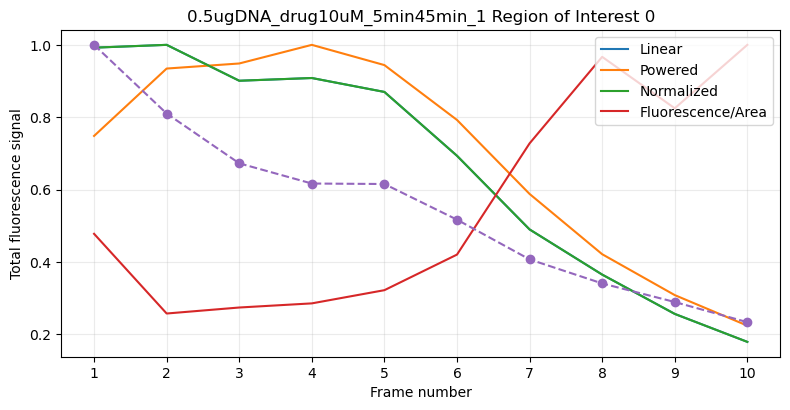

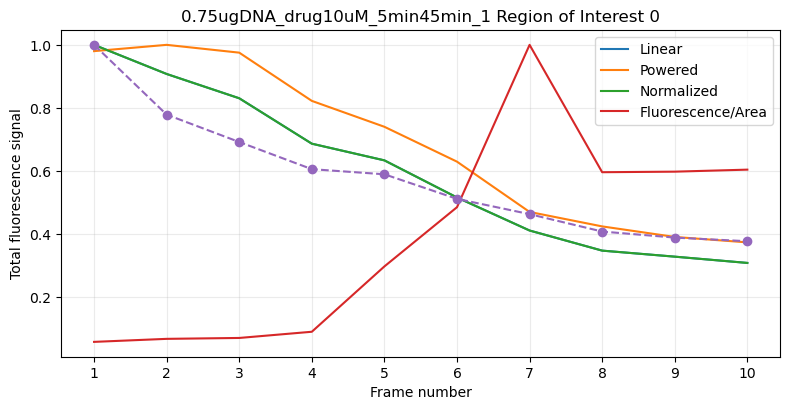

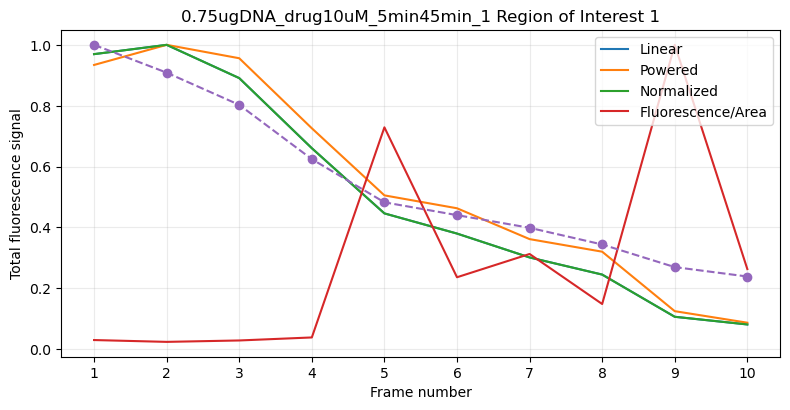

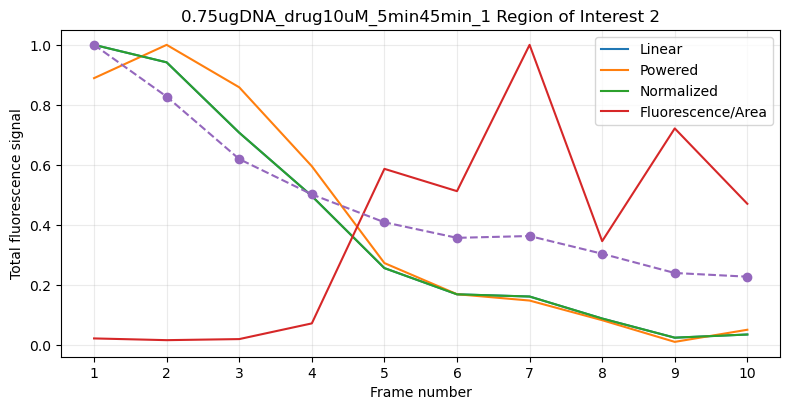

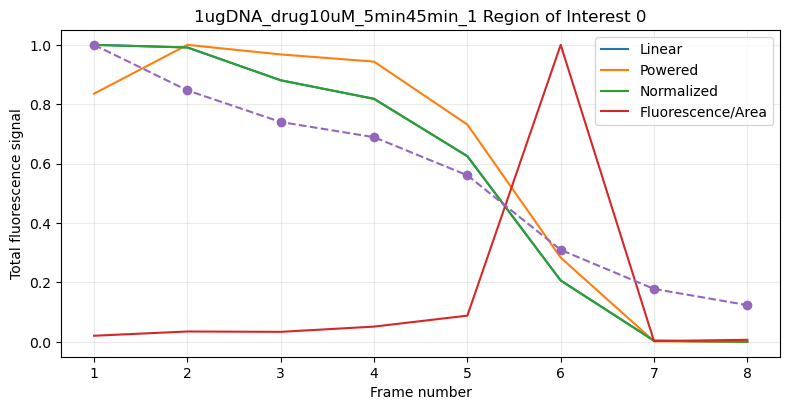

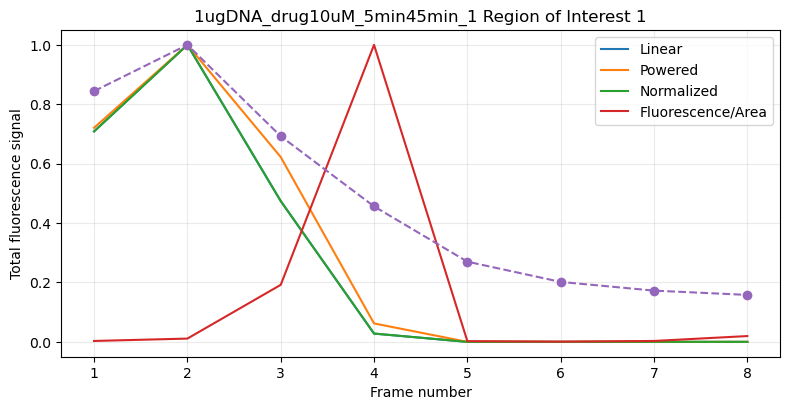

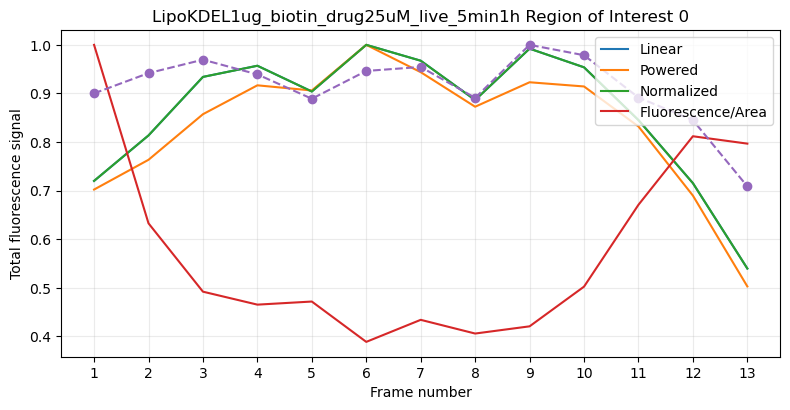

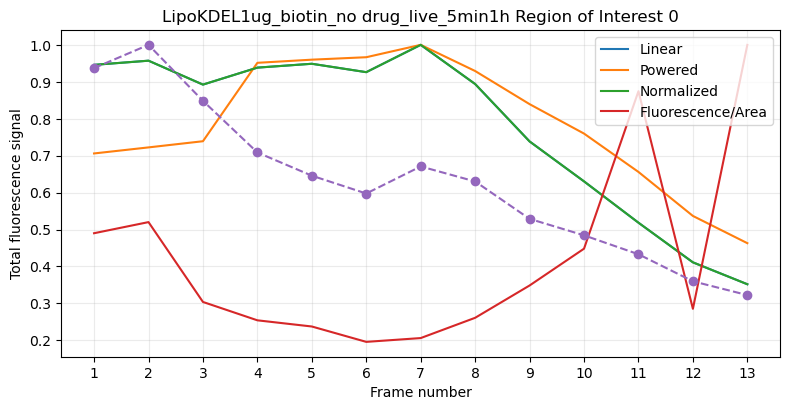

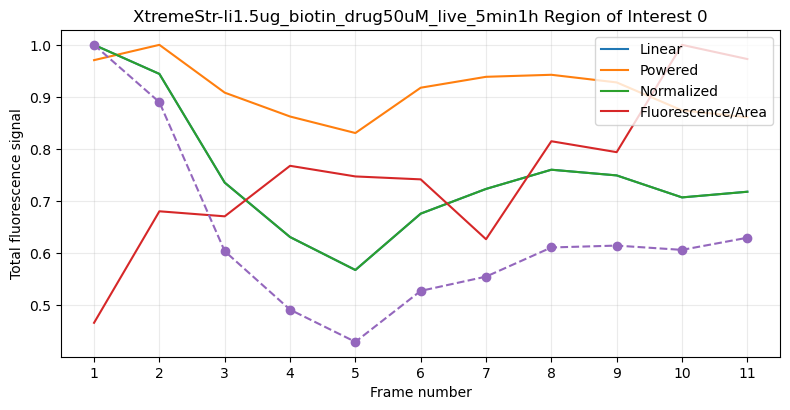

Error with XtremeStr-li1.5ug_biotin_drug50uM_live_5min1h_frame_04.jpg image


ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

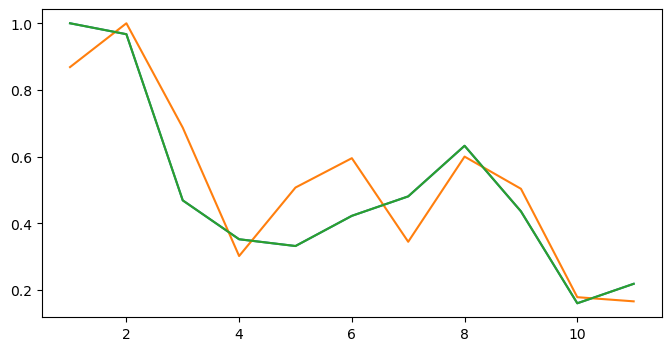

In [23]:
# This cycles through all video folders and creates the graphs
for key in region_of_interest:
    for i in range(len(region_of_interest[key])):
        video1 = extract_fluorescenceData(key, vf_dict[key], region_of_interest[key][i])

        img_overlay, overlay = overlay_threshold(key, vf_dict[key], region_of_interest[key][i])
        img_overlay = img_overlay/max(img_overlay)

        overlay1 = power_overlay(overlay)
        img_squared = extract_Data(key, vf_dict[key], region_of_interest[key][i], overlay1)
        img_squared = img_squared/max(img_squared)

        overlay2 = norm_overlay(overlay)
        img_norm = extract_Data(key, vf_dict[key], region_of_interest[key][i], overlay2)
        img_norm = img_norm/max(img_norm)

        ratio_f = ratio_Data(key, vf_dict[key], region_of_interest[key][i])
        ratio_f = ratio_f/max(ratio_f)

        frames = np.arange(1,len(img_overlay)+1)
        plt.figure(figsize = (8,4))
        plt.plot(frames, img_overlay, label = "Linear")
        plt.plot(frames, img_squared, label = "Powered")
        plt.plot(frames, img_norm, label = 'Normalized')
        plt.plot(frames, ratio_f, label = 'Fluorescence/Area')
        histogrammer(video1, key)
        plt.title(f'{key} Region of Interest {i}')
        plt.legend(loc = 'upper right')
        plt.show()

#Assessing the rate of export of TNF
Likely will require data on how fluorescence levels correspond to GFP levels to create a calibration curve.

While we are not able to assess exactly how fast it is exported and express it in terms of concentration per unit time, we can still assess whether the rate of export is linearly related or if other mathematical equations may better suit the rate of export.

In [ ]:
#chosen function: power
def linear_relation(t,m,c):
    export = m*t + c
    return export

def dcdt(t,m,c,f_actual): #vary b0
    f_predicted = linear_relation(t,m,c)
    a = np.sum(f_actual - f_predicted)
    b = -2/len(f_actual)
    const = a * b
    return const

def dmdt(t,m,c,f_actual): #vary b1
    f_predicted = linear_relation(t,m,c)
    a = np.sum((f_actual - f_predicted) * t)
    b = -2/len(f_actual)
    gradient = a * b
    return gradient

def get_lineEqn(m, c, t, f_i, max_iter=10000, lr = 1e-4, tol = 1e-5):
    for _ in range(max_iter):
        diff1 = dcdt(t,m,c,f_i)*lr
        diff2 = dmdt(t,m,c,f_i)*lr
        if abs(diff1) < tol and abs(diff2) < tol:
            break
        else:
            c-=diff1
            m-=diff2
    return m,c

def rss(y_predicted, y_actual):
    return np.sum((y_actual-y_predicted)**2)

def tss(y_predicted, y_actual):
    y_ave = np.average(y_actual)
    return np.sum((y_predicted-y_ave)**2)

def r2calc(y1, ya):
    r2 = 1 - (rss(y1,ya)/tss(y1,ya))
    return r2

In [ ]:
# We are calling both scipy's linear regression function, and our own linear
# regression model that is seen in get_lineEqn().
for key in region_of_interest.keys():
    for i in range(len(region_of_interest[key])):
        heat_map = overlay_threshold(key, vf_dict[key], region_of_interest[key][i], return_base = False)
        weighted_fluorescence = extract_Data(key, vf_dict[key], region_of_interest[key][i], power_overlay(heat_map))
        weighted_fluorescence = weighted_fluorescence/np.max(weighted_fluorescence)
        max_index = np.where(weighted_fluorescence == np.max(weighted_fluorescence))
        export = weighted_fluorescence[max_index[0][0]:]
        frames = np.arange(max_index[0][0],len(weighted_fluorescence))
        t = (np.arange(1,len(export)+1))*5
        plt.plot(frames, export, '.')
        plt.title(f'{key} \nRegion of Interest {i} \n{region_of_interest[key][i]}')

        function = linregress(t,export, alternative = 'less')
        line = linear_relation(t, function.slope, function.intercept)
        plt.plot(frames, line, label = r'export = {:.3f}t + {:.3f}, $r^2$ = {:.3f}'.format(function.slope,function.intercept,function.rvalue**2))

        m, c = get_lineEqn(m=-1,c=1, t=t, f_i = export)
        my_line = linear_relation(t,m,c)
        r2 = r2calc(my_line, export)
        plt.plot(frames, my_line, label = r'export = {:.3f}t + {:.3f}, $r^2$ = {:.3f}'.format(m, c, r2), linestyle = 'dashed')
        plt.legend(loc = 'upper right')
        plt.show()